# Funghi Classification v3


Usefull imports, try to keep all of them here and labeled!

In [17]:
''' Linear Algebra'''
import pandas as pd
import numpy as np

''' Data visualization'''
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization

'''Image loading I believe'''
from tqdm import tqdm
from PIL import Image
import itertools

'''Openpyxl'''
from openpyxl import load_workbook
from openpyxl import Workbook
from openpyxl.drawing.image import Image as imagem

import time

Choices for run time:


Don't forget to enable GPU acceleration!

`Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator` $\rightarrow$ `GPU`

Mount your google drive!

In [18]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')
# Put Colab in the context of this challenge
import os
# os.chdir allows you to change directories, like cd in the Terminal
my_drive_path="/Colab Notebooks/data-transfer-learning"  #Change accordingly to the path of your project folder
os.chdir('/content/drive/MyDrive'+my_drive_path) 

Mounted at /content/drive


## (1) Dataset Loading

In [19]:
!pwd #Check path of your mounted drive

/content/drive/MyDrive/Colab Notebooks/data-transfer-learning


In [20]:
!ls #List the contents of the directory you are in

AGAR_examples_200_per_class  microbial_dataset_generation
agar_sample_mg		     Presentation
flowers			     README.md
flowers-dataset.zip	     transfer_learning.ipynb
history.png		     VGG16.xlsx
logs


Use the following method to create 
`X_train, y_train, X_val, y_val, X_test, y_test, num_classes` depending on the `classes & path` you want to use:

In [21]:
# CALL load_data with your preferred PATH and LABELS here

df1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-transfer-learning/Presentation/First_bad_model.xlsx')
df2 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-transfer-learning/Presentation/Xception.xlsx')
df3 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-transfer-learning/Presentation/VGG16_2._badmodel.xlsx')
df4 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-transfer-learning/Presentation/DenseNet169.xlsx')
df5 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-transfer-learning/Presentation/EfficientNetB7.xlsx')
df6 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-transfer-learning/Presentation/ResNet50.xlsx')
df7 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data-transfer-learning/Presentation/VGG16.xlsx')

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(3, 22)
(4, 22)
(5, 22)
(3, 22)
(1, 22)
(4, 22)
(4, 22)


In [22]:
df1["Model"] = "Model"
df2["Model"] = "Model"
df3["Model"] = "Model"
df4["Model"] = "Model"
df5["Model"] = "Model"
df6["Model"] = "Model"
df7["Model"] = "Model"

df1["Day"] = 3
df2["Day"] = 4
df3["Day"] = 5
df4["Day"] = 6
df5["Day"] = 7
df6["Day"] = 8
df7["Day"] = 9

## (2) Visualizing dataset


In [23]:
frames = [df1, df2, df3 , df4 , df5 , df6, df7]
df_concat = pd.concat(frames)
df_concat.shape

(24, 24)

In [24]:
df_concat.dtypes

Loss_test                float64
Accuracy_test            float64
F1_score_test            float64
Precision_test           float64
Recall_test              float64
Loss_val                 float64
Accuracy_val             float64
F1_score_val             float64
Precision_val            float64
Recall_val               float64
Batch_size               float64
Epoch_reached            float64
Training_time            float64
Loss                      object
Metric1                   object
Metric2                   object
Quantity of data          object
Balancing of the data     object
Weights                   object
Pooling                   object
Class_activation          object
Learning_rate            float64
Model                     object
Day                        int64
dtype: object

In [25]:
df_new = df_concat[['Accuracy_val', 'Training_time','Model', 'Day']]
df_new.rename(columns = {'Accuracy_val':'Accuracy', 'Training_time': 'Training time'}, inplace = True)
df_new = df_new.reset_index()
df_new

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,Accuracy,Training time,Model,Day
0,0,0.785,165.222550,Model,3
1,1,0.795,169.347452,Model,3
2,2,0.750,152.656628,Model,3
3,0,0.860,232.850394,Model,4
4,1,0.855,332.073792,Model,4
5,2,0.870,570.949201,Model,4
6,3,0.820,533.697832,Model,4
7,0,0.855,540.795082,Model,5
8,1,0.885,244.885756,Model,5
9,2,0.905,417.950726,Model,5


In [26]:
df_new.loc[0,'Day'] = 1.8
df_new.loc[1,'Day'] = 2
df_new.loc[2,'Day'] = 2.1
df_new.loc[3,'Day'] = 2.7
df_new.loc[4,'Day'] = 3
df_new.loc[5,'Day'] = 3.3
df_new.loc[6,'Day'] = 3.7
df_new.loc[7,'Day'] = 3.9
df_new.loc[8,'Day'] = 4
df_new.loc[9,'Day'] = 4.2
df_new.loc[10,'Day'] = 4.5
df_new.loc[11,'Day'] = 4.9
df_new.loc[12,'Day'] = 5
df_new.loc[13,'Day'] = 5.3
df_new.loc[14,'Day'] = 5.6
df_new.loc[15,'Day'] = 5.9
df_new.loc[16,'Day'] = 6.6
df_new.loc[17,'Day'] = 7
df_new.loc[18,'Day'] = 7.3
df_new.loc[19,'Day'] = 7.8
df_new.loc[20,'Day'] = 7.9
df_new.loc[21,'Day'] = 8
df_new.loc[22,'Day'] = 8.4
df_new.loc[23,'Day'] = 8.9
df_new

,index,Accuracy,Training time,Model,Day
0,0,0.785,165.222550,Model,1.8
1,1,0.795,169.347452,Model,2.0
2,2,0.750,152.656628,Model,2.1
3,0,0.860,232.850394,Model,2.7
4,1,0.855,332.073792,Model,3.0
5,2,0.870,570.949201,Model,3.3
6,3,0.820,533.697832,Model,3.7
7,0,0.855,540.795082,Model,3.9
8,1,0.885,244.885756,Model,4.0
9,2,0.905,417.950726,Model,4.2


IndexError: ignored

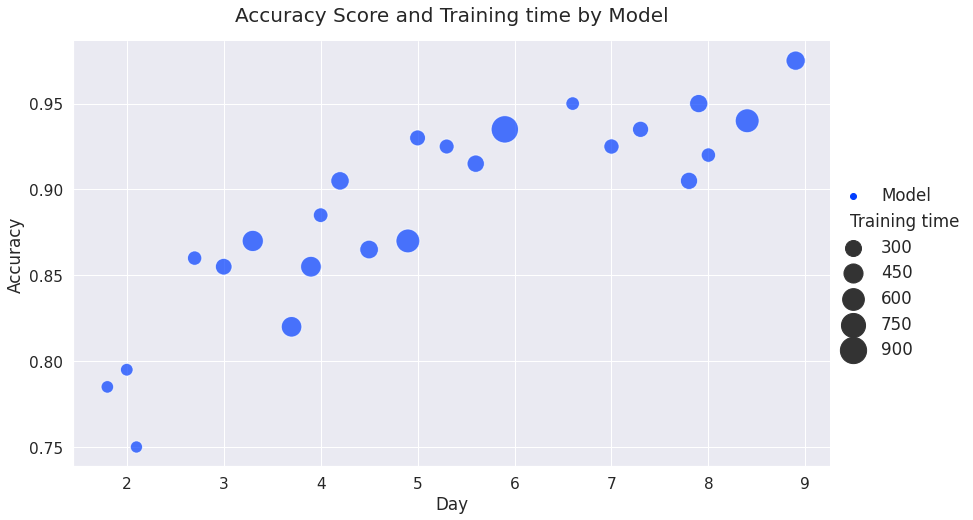

In [27]:
g = sns.relplot(x='Day', 
            y='Accuracy', 
            hue='Model', 
            size='Training time',
            data=df_new,
            sizes=(150, 750), 
            alpha=.7, 
            palette='bright', 
            height=8, 
            aspect=12/8)

# g.set_ylabel('mylabel',size=16)

sns.set_theme()
            
title = 'Accuracy Score and Training time by Model'
plt.title(title, fontsize=20, pad=20)
plt.subplots_adjust(top=0.85)

g._legend.texts[0].set_text('')
g._legend.texts[8].set_text('')
g._legend.set_bbox_to_anchor([1.05, .63])
plt.setp(g._legend.get_texts(), fontsize='16')

filename = 'sns-scatterplot'
plt.savefig(filename+'.png')

In [1]:

array = [[26,0,0,0,0], 
        [1,29,0,1,0], 
        [0,0,35,3,0], 
        [0,0,0,33,0], 
        [0,0,0,3,35]]

# df_cm = pd.DataFrame(array, index = [i for i in "12345"],
#                   columns = [i for i in "12345"])
# plt.figure(figsize = (10,7))
# sn.heatmap(df_cm, annot=True)

df_cm = pd.DataFrame(array, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
# plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size

plt.show()
plt.savefig('destination_path.eps', format='eps')

# filename = 'sns-confusionmatrix'
# plt.savefig(filename+'.eps')


NameError: ignored